# udacity - SFND - Camera Based 2D Feature Tracking  

### Keypoints Descriptor evaluation

In this evaluation the area on the preceding vehicle was already filtered.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tabulate import tabulate


In [2]:
## Importing report file.
df_detector_raw = pd.read_csv('210319_output/Detector_report.txt', sep=',',names=["Detector","image","keypoints","time","pc","nhs"])

In [3]:
df_detector_raw.head(3)

,Detector,image,keypoints,time,pc,nhs
0,SHITOMASI,1,1370,45.5081,125,4.0
1,SHITOMASI,2,1301,21.3494,118,4.0
2,SHITOMASI,3,1361,18.7879,123,4.0


In [4]:
## Importing report file.
df_descriptor_raw = pd.read_csv('210319_output/Descriptor_report.txt', sep=',',names=["Detector","Descriptor","image","keypoints","time"])

In [5]:
## Ploting Dataframe to check convertion.
df_descriptor_raw.head(3)

,Detector,Descriptor,image,keypoints,time
0,SHITOMASI,BRISK,1,125,1.90653
1,SHITOMASI,BRISK,2,118,1.67109
2,SHITOMASI,BRISK,3,123,1.77974


In [6]:
for i, row in df_detector_raw.iterrows(): 
    detect = df_detector_raw.loc[i,"Detector"]
    detc_time = df_detector_raw.loc[i,"time"]
    detc_img = df_detector_raw.loc[i,"image"]
    for j, row in df_descriptor_raw.iterrows(): 
        if df_descriptor_raw.loc[j,"Detector"]== detect and df_descriptor_raw.loc[j,"image"]== detc_img:
            df_descriptor_raw.loc[j,"time"]= df_descriptor_raw.loc[j,"time"]+detc_time

In [7]:
df_descriptor_raw.head(5)

,Detector,Descriptor,image,keypoints,time
0,SHITOMASI,BRISK,1,125,47.41463
1,SHITOMASI,BRISK,2,118,23.02049
2,SHITOMASI,BRISK,3,123,20.56764
3,SHITOMASI,BRISK,4,120,21.89561
4,SHITOMASI,BRISK,5,120,19.82245


## !! Now we have the aggregated total time to be considered for this step evaluation !!

In [8]:
## Summary table considering the mean of keypoints and elapsedtime [ms].
## For each combination of Detectors and Descriptors.

descriptor_group = df_descriptor_raw.groupby(["Detector","Descriptor"])["keypoints", "time"].mean()
descriptor_group.head(10)

keypoints        time
Detector Descriptor                       
AKAZE    AKAZE           167.0  235.875700
         BRIEF           167.0  130.270023
         BRISK           167.0  131.996354
         FREAK           167.0  182.217320
         ORB             167.0  132.302422
         SIFT            167.0  173.683270
BRISK    BRIEF           276.2   49.728725
         BRISK           276.2   52.158289
         FREAK           256.3   99.910530
         ORB             276.2   53.515038

In [9]:
## In order to make easie the visualisation, lets split de Dataframe for each 
#Detector dataset to check the results for the combination of the descriptors features.

detc_AKAZE = df_descriptor_raw[df_descriptor_raw['Detector'] == "AKAZE"]
detc_BRISK = df_descriptor_raw[df_descriptor_raw['Detector'] == "BRISK"]
detc_FAST = df_descriptor_raw[df_descriptor_raw['Detector'] == "FAST"]
detc_HARRIS = df_descriptor_raw[df_descriptor_raw['Detector'] == "HARRIS"]
detc_ORB = df_descriptor_raw[df_descriptor_raw['Detector'] == "ORB"]
detc_SHITOMASI = df_descriptor_raw[df_descriptor_raw['Detector'] == "SHITOMASI"]
detc_SIFT = df_descriptor_raw[df_descriptor_raw['Detector'] == "SIFT"]

In [10]:
detc_AKAZE.head(3)

,Detector,Descriptor,image,keypoints,time
250,AKAZE,BRISK,1,166,140.41098
251,AKAZE,BRISK,2,157,131.21087
252,AKAZE,BRISK,3,161,129.76762


In [11]:
## In order to make easie the visualisation, lets split de Dataframe for each 
#Detector dataset to check the results for the combination of the descriptors features.
fmatchAKAZE = detc_AKAZE[["Detector","Descriptor","keypoints","time"]]
fmatchBRISK = detc_BRISK[["Detector","Descriptor","keypoints","time"]]
fmatchFAST = detc_FAST[["Detector","Descriptor","keypoints","time"]]
fmatchHARRIS = detc_HARRIS [["Detector","Descriptor","keypoints","time"]]
fmatchORB = detc_ORB[["Detector","Descriptor","keypoints","time"]]
fmatchSHITOMASI = detc_SHITOMASI[["Detector","Descriptor","keypoints","time"]]
fmatchSIFT = detc_SIFT[["Detector","Descriptor","keypoints","time"]]

fmatchAKAZE = fmatchAKAZE.groupby(["Detector","Descriptor"])["keypoints","time"].mean()
fmatchAKAZE["keypoints"]=fmatchAKAZE["keypoints"].astype(int)
fmatchBRISK = fmatchBRISK.groupby(["Detector","Descriptor"])["keypoints","time"].mean()
fmatchBRISK["keypoints"]=fmatchBRISK["keypoints"].astype(int)
fmatchFAST = fmatchFAST.groupby(["Detector","Descriptor"])["keypoints","time"].mean()
fmatchFAST["keypoints"]=fmatchFAST["keypoints"].astype(int)
fmatchHARRIS = fmatchHARRIS.groupby(["Detector","Descriptor"])["keypoints","time"].mean()
fmatchHARRIS["keypoints"]=fmatchHARRIS["keypoints"].astype(int)
fmatchORB = fmatchORB.groupby(["Detector","Descriptor"])["keypoints","time"].mean()
fmatchORB["keypoints"]=fmatchORB["keypoints"].astype(int)
fmatchSHITOMASI = fmatchSHITOMASI.groupby(["Detector","Descriptor"])["keypoints","time"].mean()
fmatchSHITOMASI["keypoints"]=fmatchSHITOMASI["keypoints"].astype(int)
fmatchSIFT = fmatchSIFT.groupby(["Detector","Descriptor"])["keypoints","time"].mean()
fmatchSIFT["keypoints"]=fmatchSIFT["keypoints"].astype(int)

In [12]:
print(tabulate(fmatchAKAZE, tablefmt="pipe", headers="keys",numalign="center"))
print("")
print(tabulate(fmatchBRISK, tablefmt="pipe", headers="keys",numalign="center"))
print("")
print(tabulate(fmatchFAST, tablefmt="pipe", headers="keys",numalign="center"))
print("")
print(tabulate(fmatchHARRIS, tablefmt="pipe", headers="keys",numalign="center"))
print("")
print(tabulate(fmatchORB, tablefmt="pipe", headers="keys",numalign="center"))
print("")
print(tabulate(fmatchSHITOMASI , tablefmt="pipe", headers="keys",numalign="center"))
print("")
print(tabulate(fmatchSIFT, tablefmt="pipe", headers="keys",numalign="center"))

|                    |  keypoints  |  time   |
|:-------------------|:-----------:|:-------:|
| ('AKAZE', 'AKAZE') |     167     | 235.876 |
| ('AKAZE', 'BRIEF') |     167     | 130.27  |
| ('AKAZE', 'BRISK') |     167     | 131.996 |
| ('AKAZE', 'FREAK') |     167     | 182.217 |
| ('AKAZE', 'ORB')   |     167     | 132.302 |
| ('AKAZE', 'SIFT')  |     167     | 173.683 |

|                    |  keypoints  |  time   |
|:-------------------|:-----------:|:-------:|
| ('BRISK', 'BRIEF') |     276     | 49.7287 |
| ('BRISK', 'BRISK') |     276     | 52.1583 |
| ('BRISK', 'FREAK') |     256     | 99.9105 |
| ('BRISK', 'ORB')   |     276     | 53.515  |
| ('BRISK', 'SIFT')  |     276     | 124.392 |

|                   |  keypoints  |  time   |
|:------------------|:-----------:|:-------:|
| ('FAST', 'BRIEF') |     149     | 1.94531 |
| ('FAST', 'BRISK') |     149     | 3.12418 |
| ('FAST', 'FREAK') |     149     | 49.8411 |
| ('FAST', 'ORB')   |     149     | 2.21175 |
| ('FAST', 'SIFT'

The next evaluation will show 2 plottings. the first one(top), show all descritor behavior and the other (bottom) is limited the y vector scale to check with more precision the best Descriptor feature

## AKASE Detector + Different Descriptors

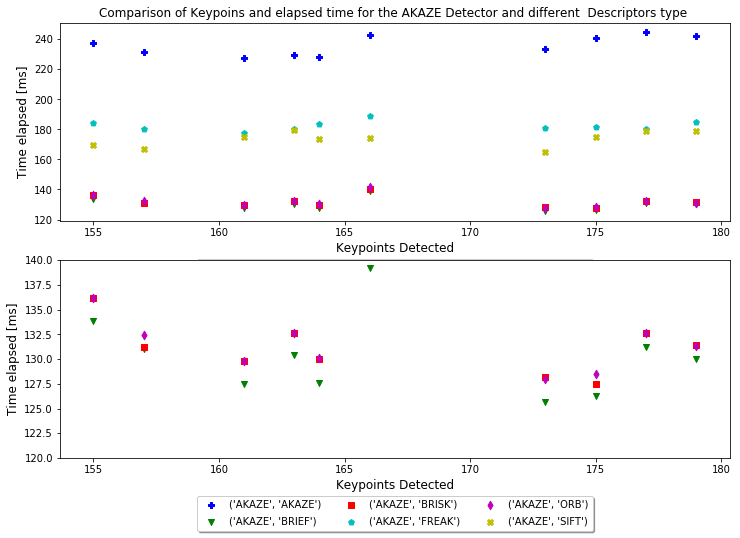

In [13]:
##Scatter Plotting to show the distribution points over AKAZE detector and dfferent
#descriptors types evaluated

fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
colors = ['b','g', 'r','c','m','y']
markers = ['P','v', 's','p','d','X']
counter = 0
for key, grp in detc_AKAZE.groupby(["Detector","Descriptor"]):
    ax1.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])

    ax2.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
    

ax1.set_xlabel('Keypoints Detected',fontsize=12)
ax1.set_ylabel('Time elapsed [ms]', fontsize=12)
ax1.set_title('Comparison of Keypoins and elapsed time for the AKAZE Detector and different  Descriptors type ')
ax1.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

ax2.set_xlabel('Keypoints Detected',fontsize=12)
ax2.set_ylabel('Time elapsed [ms]', fontsize=12)
ax2.set_ylim(120,140)
ax2.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)
plt.show()

## BRISK Detector + Different Descriptors

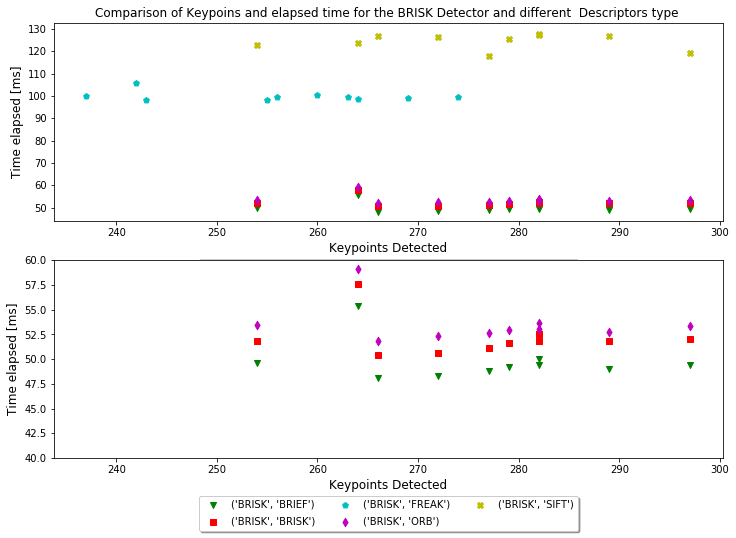

In [14]:
##Scatter Plotting to show the distribution points over BRISK detector and dfferent
#descriptors types evaluated

fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
colors = ['b','g', 'r','c','m','y']
markers = ['o','v', 's','p','d','X','.']
counter =1
for key, grp in detc_BRISK.groupby(["Detector","Descriptor"]):
    ax1.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])

    ax2.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
    

ax1.set_xlabel('Keypoints Detected',fontsize=12)
ax1.set_ylabel('Time elapsed [ms]', fontsize=12)
ax1.set_title('Comparison of Keypoins and elapsed time for the BRISK Detector and different  Descriptors type ')
ax1.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

ax2.set_xlabel('Keypoints Detected',fontsize=12)
ax2.set_ylabel('Time elapsed [ms]', fontsize=12)
ax2.set_ylim(40,60)
ax2.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)
plt.show()

## FAST Detector + Different Descriptors

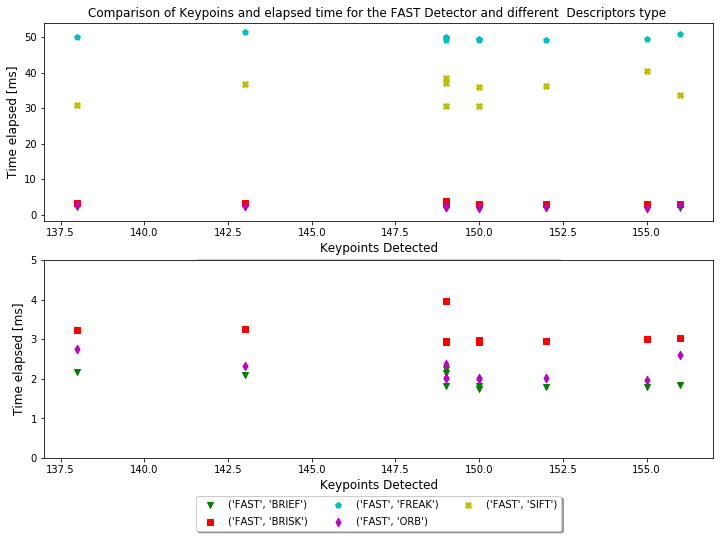

In [15]:
##Scatter Plotting to show the distribution points over FAST detector and dfferent
#descriptors types evaluated
fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
colors = ['b','g', 'r','c','m','y']
markers = ['o','v', 's','p','d','X']
counter =1
for key, grp in detc_FAST.groupby(["Detector","Descriptor"]):
    ax1.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])

    ax2.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
    

ax1.set_xlabel('Keypoints Detected',fontsize=12)
ax1.set_ylabel('Time elapsed [ms]', fontsize=12)
ax1.set_title('Comparison of Keypoins and elapsed time for the FAST Detector and different  Descriptors type ')
ax1.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

ax2.set_xlabel('Keypoints Detected',fontsize=12)
ax2.set_ylabel('Time elapsed [ms]', fontsize=12)
ax2.set_ylim(0,5)
ax2.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)
plt.savefig('images/Det_FAST_Descriptors_evaluation.png')
plt.show()

## HARRIS Detector + Different Descriptors

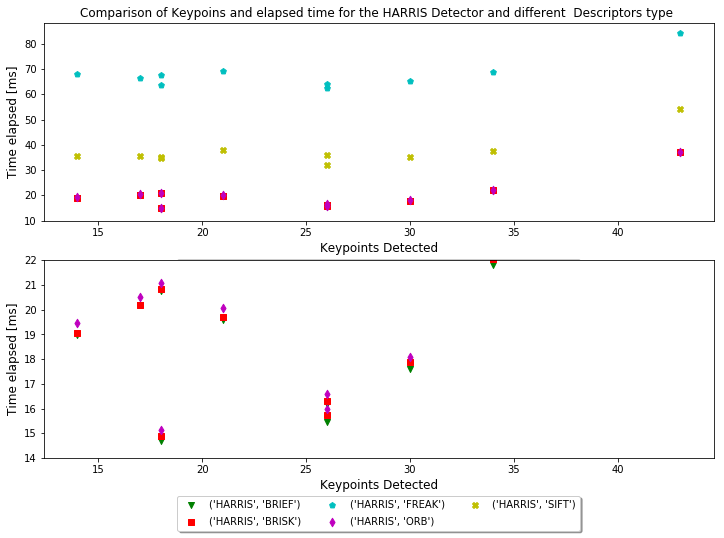

In [16]:
##Scatter Plotting to show the distribution points over HARRIS detector and dfferent
#descriptors types evaluated

fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
colors = ['b','g', 'r','c','m','y']
markers = ['o','v', 's','p','d','X']
counter =1
for key, grp in detc_HARRIS.groupby(["Detector","Descriptor"]):
    ax1.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])

    ax2.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
    

ax1.set_xlabel('Keypoints Detected',fontsize=12)
ax1.set_ylabel('Time elapsed [ms]', fontsize=12)
ax1.set_title('Comparison of Keypoins and elapsed time for the HARRIS Detector and different  Descriptors type ')
ax1.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

ax2.set_xlabel('Keypoints Detected',fontsize=12)
ax2.set_ylabel('Time elapsed [ms]', fontsize=12)
ax2.set_ylim(14,22)
ax2.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)
plt.show()

## ORB Detector + Different Descriptors

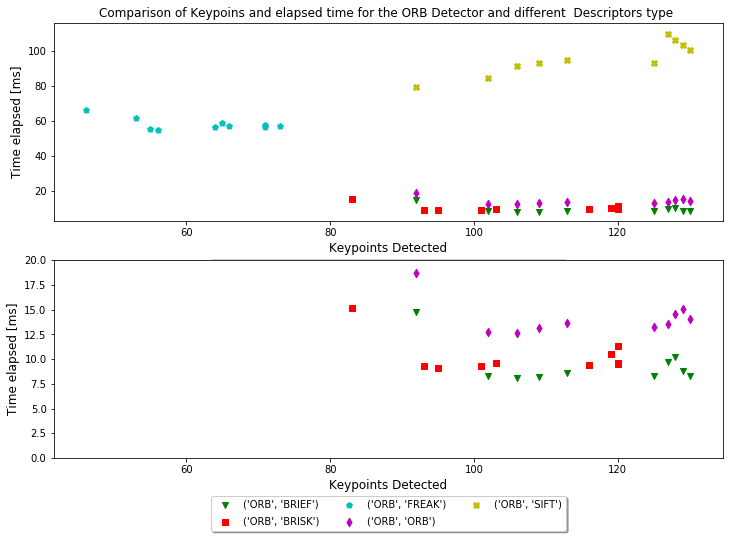

In [17]:
##Scatter Plotting to show the distribution points over ORB detector and dfferent
#descriptors types evaluated

fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
colors = ['b','g', 'r','c','m','y']
markers = ['o','v', 's','p','d','X']
counter =1
for key, grp in detc_ORB.groupby(["Detector","Descriptor"]):
    ax1.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])

    ax2.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
    

ax1.set_xlabel('Keypoints Detected',fontsize=12)
ax1.set_ylabel('Time elapsed [ms]', fontsize=12)
ax1.set_title('Comparison of Keypoins and elapsed time for the ORB Detector and different  Descriptors type ')
ax1.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

ax2.set_xlabel('Keypoints Detected',fontsize=12)
ax2.set_ylabel('Time elapsed [ms]', fontsize=12)
ax2.set_ylim(0,20)
ax2.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)
plt.show()

## SHITOMASI Detector + Different Descriptors

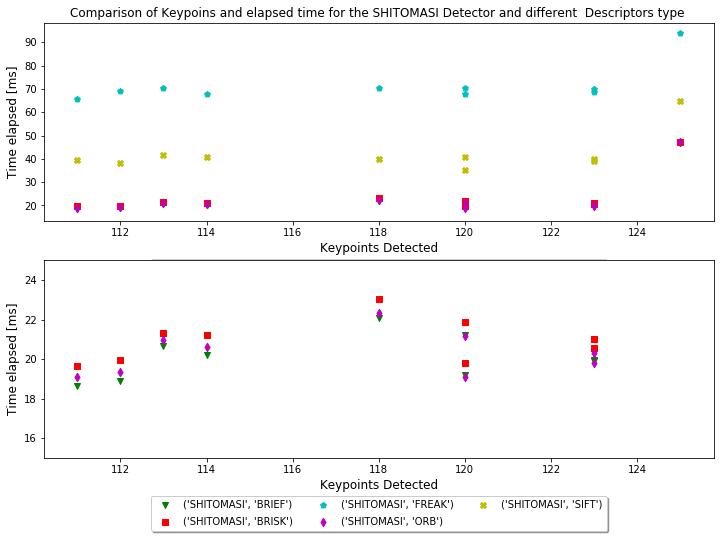

In [18]:
##Scatter Plotting to show the distribution points over SHITOMASI detector and dfferent
#descriptors types evaluated

fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
colors = ['b','g', 'r','c','m','y']
markers = ['o','v', 's','p','d','X']
counter =1
for key, grp in detc_SHITOMASI.groupby(["Detector","Descriptor"]):
    ax1.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])

    ax2.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
    

ax1.set_xlabel('Keypoints Detected',fontsize=12)
ax1.set_ylabel('Time elapsed [ms]', fontsize=12)
ax1.set_title('Comparison of Keypoins and elapsed time for the SHITOMASI Detector and different  Descriptors type ')
ax1.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

ax2.set_xlabel('Keypoints Detected',fontsize=12)
ax2.set_ylabel('Time elapsed [ms]', fontsize=12)
ax2.set_ylim(15,25)
ax2.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

plt.show()

## SIFT Detector + Different Descriptors

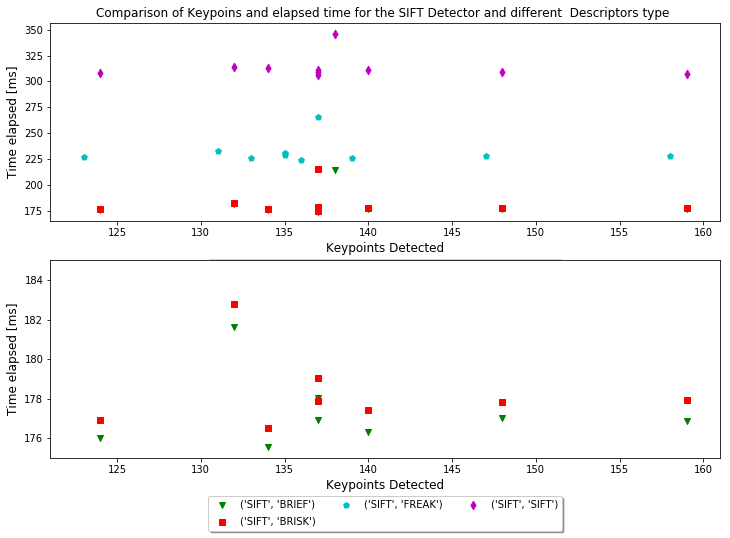

In [19]:
##Scatter Plotting to show the distribution points over SIFT detector and dfferent
#descriptors types evaluated

fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
colors = ['b','g', 'r','c','m','y']
markers = ['o','v', 's','p','d','X']
counter =1
for key, grp in detc_SIFT.groupby(["Detector","Descriptor"]):
    ax1.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])

    ax2.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
    

ax1.set_xlabel('Keypoints Detected',fontsize=12)
ax1.set_ylabel('Time elapsed [ms]', fontsize=12)
ax1.set_title('Comparison of Keypoins and elapsed time for the SIFT Detector and different  Descriptors type ')
ax1.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)

ax2.set_xlabel('Keypoints Detected',fontsize=12)
ax2.set_ylabel('Time elapsed [ms]', fontsize=12)
ax2.set_ylim(175,185)
ax2.legend(loc='center', bbox_to_anchor=(0.5,-0.28),ncol=3, fancybox=True, shadow=True ,labelspacing=0.7)
plt.savefig('images/Det_SIFT_Descriptors_evaluation.png')
plt.show()

The BRIEF feature had calculated the descriptor with the lowest elapsed time.
So lets compare all the Detectors together with only the BRIEF descriptor feature.

In [20]:
desc_BRIEF = df_descriptor_raw[df_descriptor_raw['Descriptor'] == "BRIEF"]

In [21]:
desc_BRIEF.head(5)

,Detector,Descriptor,image,keypoints,time
10,SHITOMASI,BRIEF,1,125,46.663860
11,SHITOMASI,BRIEF,2,118,22.094488
12,SHITOMASI,BRIEF,3,123,19.916370
13,SHITOMASI,BRIEF,4,120,21.211990
14,SHITOMASI,BRIEF,5,120,19.199640


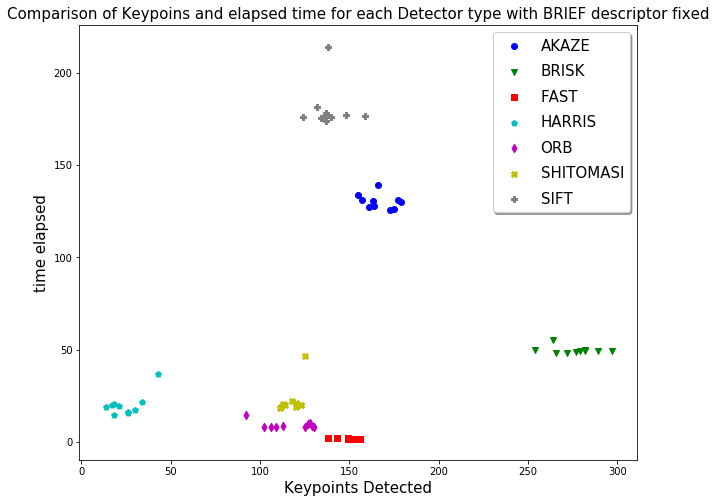

In [22]:
##Scatter Plotting to show the distribution points over all detectors types evaluated

colors = ['b','g', 'r','c','m','y','gray']
markers = ['o','v', 's','p','d','X','P']
counter =0

fig, ax = plt.subplots(figsize=(10,8))
for key, grp in desc_BRIEF.groupby(['Detector']):
    ax.scatter(grp["keypoints"], grp["time"], label=key ,color= colors[counter],marker= markers[counter])
    counter +=1
ax.legend()
ax.set_xlabel('Keypoints Detected',fontsize=15)
ax.set_ylabel('time elapsed', fontsize=15)
ax.set_title('Comparison of Keypoins and elapsed time for each Detector type with BRIEF descriptor fixed',fontsize=15)
ax.legend( fancybox=True, shadow=True ,labelspacing=0.7, fontsize=15)

plt.savefig('images/Descriptor_BRIEF_Detectors_evaluation.png')

plt.show()

## Conclusion

The BRIEF descriptor feature shows the best choice for the most combined Detectors also regard matching points between the scenes(MP.8). On the last plot we can see that ,the combined BRISK+BRIEF has the highest number of descriptor points detected on de preceding vehicle and the processing time is something around 50 mili seconds maximum. Depends of the application this combination could be chosen, but we have a group of combinations that are capable to process the descriptor points under the 25 millisecond. If the application request a high frequency to read the data and this quantity of the descriptors keypoints is enough sufficient, the combination of FAST+BRIEF could be chosen. The results of AKAZE+BRIEF and SIFT+BRIEF must be avoided because the elapsed time necessary is to large comparing with others and HARRIS + BRIEF also must be avoided, it has a good performance regard time , but the number of descriptor keypoints processed is very small.

